## *Import Libraries*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## *Load Cleaned Data*

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
%time df = pd.read_csv('02_flight_data_cleaned.csv')

Wall time: 6.85 s


In [4]:
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DISTANCE_GROUP,DIV_AIRPORT_LANDINGS
0,2019,1,1,3,4,2019-01-03,9E,20363,9E,N195PQ,5121,15412,1541205,35412,TYS,"Knoxville, TN",TN,47,Tennessee,54,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,1140,1205.0,25.0,25.0,1.0,1.0,1100-1159,30.0,1235.0,1311.0,4.0,1250,1315.0,25.0,25.0,1.0,1.0,1200-1259,0.0,0.0,70.0,70.0,36.0,152.0,1,0
1,2019,1,1,4,5,2019-01-04,9E,20363,9E,N919XJ,5121,15412,1541205,35412,TYS,"Knoxville, TN",TN,47,Tennessee,54,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,1140,1250.0,70.0,70.0,1.0,4.0,1100-1159,35.0,1325.0,1403.0,9.0,1250,1412.0,82.0,82.0,1.0,5.0,1200-1259,0.0,0.0,70.0,82.0,38.0,152.0,1,0
2,2019,1,1,5,6,2019-01-05,9E,20363,9E,N316PQ,5122,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,14783,1478302,34783,SGF,"Springfield, MO",MO,29,Missouri,64,950,956.0,6.0,6.0,0.0,0.0,0900-0959,20.0,1016.0,1040.0,3.0,1051,1043.0,-8.0,0.0,0.0,-1.0,1000-1059,0.0,0.0,121.0,107.0,84.0,563.0,3,0
3,2019,1,1,6,7,2019-01-06,9E,20363,9E,N325PQ,5122,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,14783,1478302,34783,SGF,"Springfield, MO",MO,29,Missouri,64,950,945.0,-5.0,0.0,0.0,-1.0,0900-0959,16.0,1001.0,1026.0,3.0,1053,1029.0,-24.0,0.0,0.0,-2.0,1000-1059,0.0,0.0,123.0,104.0,85.0,563.0,3,0
4,2019,1,1,7,1,2019-01-07,9E,20363,9E,N904XJ,5122,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,14783,1478302,34783,SGF,"Springfield, MO",MO,29,Missouri,64,950,947.0,-3.0,0.0,0.0,-1.0,0900-0959,25.0,1012.0,1040.0,4.0,1053,1044.0,-9.0,0.0,0.0,-1.0,1000-1059,0.0,0.0,123.0,117.0,88.0,563.0,3,0


In [5]:
df.shape

(1749100, 55)

In [6]:
df.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749100 entries, 0 to 1749099
Data columns (total 55 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   YEAR                   1749100 non-null  int64  
 1   QUARTER                1749100 non-null  int64  
 2   MONTH                  1749100 non-null  int64  
 3   DAY_OF_MONTH           1749100 non-null  int64  
 4   DAY_OF_WEEK            1749100 non-null  int64  
 5   FL_DATE                1749100 non-null  object 
 6   OP_UNIQUE_CARRIER      1749100 non-null  object 
 7   OP_CARRIER_AIRLINE_ID  1749100 non-null  int64  
 8   OP_CARRIER             1749100 non-null  object 
 9   TAIL_NUM               1741229 non-null  object 
 10  OP_CARRIER_FL_NUM      1749100 non-null  int64  
 11  ORIGIN_AIRPORT_ID      1749100 non-null  int64  
 12  ORIGIN_AIRPORT_SEQ_ID  1749100 non-null  int64  
 13  ORIGIN_CITY_MARKET_ID  1749100 non-null  int64  
 14  ORIGIN            

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,1749100.0,2.019000e+03,0.000000,2019.0,2019.0,2019.0,2019.0,2019.0
QUARTER,1749100.0,1.000000e+00,0.000000,1.0,1.0,1.0,1.0,1.0
MONTH,1749100.0,2.027570e+00,0.833314,1.0,1.0,2.0,3.0,3.0
DAY_OF_MONTH,1749100.0,1.562289e+01,8.698871,1.0,8.0,16.0,23.0,31.0
DAY_OF_WEEK,1749100.0,3.965825e+00,1.974514,1.0,2.0,4.0,6.0,7.0
OP_CARRIER_AIRLINE_ID,1749100.0,1.998390e+04,376.702421,19393.0,19790.0,19977.0,20368.0,20452.0
OP_CARRIER_FL_NUM,1749100.0,2.537897e+03,1811.790030,1.0,993.0,2127.0,3895.0,7439.0
ORIGIN_AIRPORT_ID,1749100.0,1.265825e+04,1520.719963,10135.0,11292.0,12889.0,13970.0,16218.0
ORIGIN_AIRPORT_SEQ_ID,1749100.0,1.265828e+06,152071.746412,1013505.0,1129202.0,1288903.0,1397005.0,1621802.0
ORIGIN_CITY_MARKET_ID,1749100.0,3.175228e+04,1299.137040,30070.0,30713.0,31453.0,32467.0,35991.0


*Examining Outliers*

In [8]:
# Checking how many flights have flight time less than or equal to 15 minutes
df[df['ACTUAL_ELAPSED_TIME'] <= 15]

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DISTANCE_GROUP,DIV_AIRPORT_LANDINGS
693320,2019,1,2,12,2,2019-02-12,AS,19930,AS,N644AS,65,15841,1584102,35841,WRG,"Wrangell, AK",AK,2,Alaska,1,14256,1425605,34256,PSG,"Petersburg, AK",AK,2,Alaska,1,1045,1029.0,-16.0,0.0,0.0,-2.0,1000-1059,4.0,1033.0,1042.0,2.0,1105,1044.0,-21.0,0.0,0.0,-2.0,1100-1159,0.0,0.0,20.0,15.0,9.0,31.0,1,0


*Both Arrival city and Departure city are in same state, distance between the airports is 31 miles*

In [9]:
df['DEP_DEL15'].value_counts()

0.0    1389120
1.0     316606
Name: DEP_DEL15, dtype: int64

In [10]:
def delayed_ontime_flight_dist(dataf, grouped_by, ontime, delayed, axis):
    
    ot = sns.barplot(x = dataf[ontime], y = dataf[grouped_by], data = dataf, palette = 'Blues_r', ax = axis, orient = 'h')
    #for index, row in dataf.iterrows():
        #ot.text(row[ontime]/2, row.name, round((row[ontime] /(row[ontime] + row[delayed])) * 100,2), color='white', ha="center")
    
    dl = sns.barplot(x = dataf[delayed], y = dataf[grouped_by], data = dataf, palette = 'Reds_r', ax = axis, orient = 'h')
    #for index, row in dataf.iterrows():
        #dl.text(row[delayed]/2, row.name, round((row[delayed] / (row[ontime] + row[delayed])) * 100,2), color='white', ha="center")
        
    _ = axis.set_xlabel('COUNT')

## *Distribution of Delayed Flights by Carrier*

In [11]:
carrier_dict = {'9E': 'Endeavor Air Inc.(Delta subsidiary)',
                'AA': 'American Airlines Inc.', 
                'AS': 'Alaska Airlines Inc.',
                'B6': 'JetBlue Airways', 
                'DL': 'Delta Air Lines Inc.',
                'EV': 'ExpressJet Airlines LLC',
                'F9': 'Frontier Airlines Inc.',                 
                'G4': 'Allegiant Air', 
                'HA': 'Hawaiian Airlines Inc.', 
                'MQ': 'Envoy Air(American Airlines subsidiary)',
                'NK': 'Spirit Air Lines', 
                'OH': 'PSA Airlines Inc.(American Airlines subsidiary)', 
                'OO': 'SkyWest Airlines Inc.',
                'UA': 'United Air Lines Inc.', 
                'WN': 'Southwest Airlines Co.', 
                'YV': 'Mesa Airlines Inc.',
                'YX': 'Republic Airline'                 
                 }

In [12]:
delay_by_Carrier = df.groupby('OP_UNIQUE_CARRIER')['DEP_DEL15'].sum().reset_index().sort_values(by = 'DEP_DEL15', ascending = False)
delay_by_Carrier['OP_UNIQUE_CARRIER'] = delay_by_Carrier.OP_UNIQUE_CARRIER.map(carrier_dict)

Text(0.5, 0, 'COUNT OF DELAYED FLIGHTS')

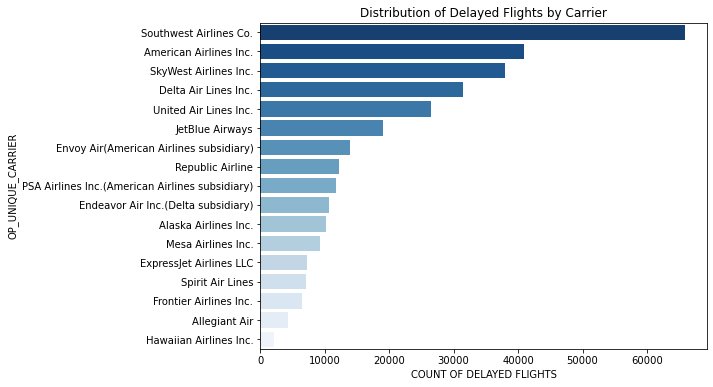

In [13]:
plt.figure(figsize = (8, 6))
_ = sns.barplot(x = delay_by_Carrier['DEP_DEL15'], y = delay_by_Carrier['OP_UNIQUE_CARRIER'], palette = 'Blues_r').set_title('Distribution of Delayed Flights by Carrier')
plt.xlabel('COUNT OF DELAYED FLIGHTS')

## *Distribution of Ontime & Delayed flights by Carrier*

In [14]:
pct_delay_by_Carrier = df.groupby('OP_UNIQUE_CARRIER')['DEP_DEL15'].mean().reset_index().rename(columns={'DEP_DEL15':'DELAYED'}).sort_values(by = 'DELAYED', ascending = False)
pct_delay_by_Carrier['OP_UNIQUE_CARRIER'] = pct_delay_by_Carrier.OP_UNIQUE_CARRIER.map(carrier_dict)
pct_delay_by_Carrier['DELAYED'] = pct_delay_by_Carrier['DELAYED'] * 100
pct_delay_by_Carrier['ONTIME'] = 100 - pct_delay_by_Carrier['DELAYED']

#Stack bar charts - Matplotlib

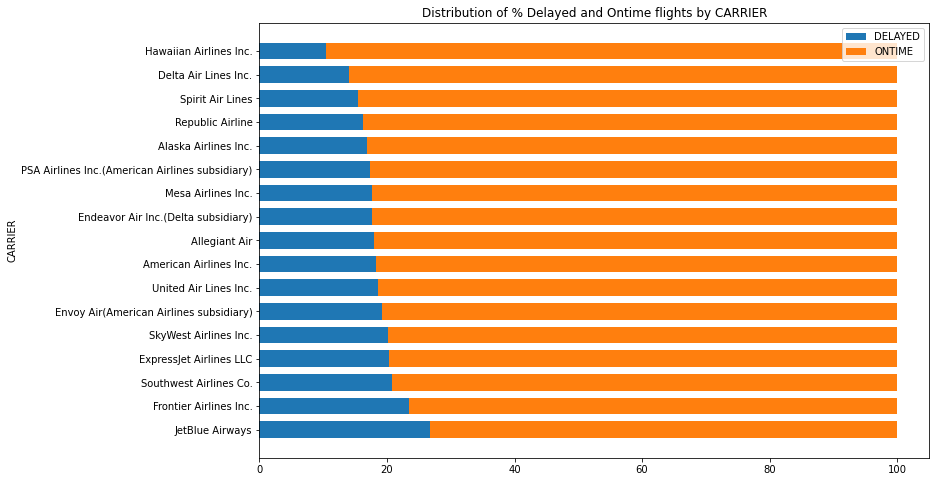

In [15]:
labels = pct_delay_by_Carrier['OP_UNIQUE_CARRIER']
width = 0.7       

fig, ax1 = plt.subplots(figsize=(12, 8))

ax1.barh(labels, pct_delay_by_Carrier['DELAYED'], width, label='DELAYED')
ax1.barh(labels, pct_delay_by_Carrier['ONTIME'], width, left=pct_delay_by_Carrier['DELAYED'], label='ONTIME')

ax1.set_ylabel('CARRIER')
ax1.set_title('Distribution of % Delayed and Ontime flights by CARRIER')
ax1.legend()

plt.show()

*Airlines Frontier, Jetblue have most % delayed flights when compared to Hawaiian Arlines, Delta Airlines which have least % delayed  flights. Carrier can be considered as an impotant feature*  

## *Distribution of Delayed Flights by ORIGIN*

In [16]:
# Setting a dictionary of origin airport names for the plot
airport_dict = {'ORD': "Chicago O'Hare", 
                 'ATL': 'Atlanta', 
                 'DFW': 'Dallas/Fort Worth', 
                 'SFO': 'San Francisco', 
                 'DEN': 'Denver', 
                 'EWR': 'Newark',
                 'LGA': 'LaGuardia', 
                 'LAX': 'Los Angeles', 
                 'CLT': 'Charlotte Douglas',
                 'MDW': 'Chicago Midway',
                 'BOS': 'Boston', 
                 'PHX': 'Phoenix Sky Harbor', 
                 'LAS': 'McCarran',
                 'MCO': 'Orlando', 
                 'IAH': 'George Bush Intercontinental', 
                 'DCA': 'Ronald Reagan Washington',
                 'PHL': 'Philadelphia',
                 'MSP': 'Minneapolis−Saint Paul',
                 'JFK': 'John F. Kennedy',
                 'HYA': 'Barnstable',
                 'OTH': 'Southwest Oregon',
                 'OGD': 'Ogden-Hinckley',
                 'HGR': 'Hagerstown',
                 'ADK': 'Adak'}

In [17]:
delay_by_Origin = df.groupby('ORIGIN')['DEP_DEL15'].sum().reset_index().sort_values(by = 'DEP_DEL15', ascending = False)
delay_by_Origin['ORIGIN'] = delay_by_Origin.ORIGIN.map(airport_dict)

Text(0.5, 0, 'COUNT OF DELAYED FLIGHTS')

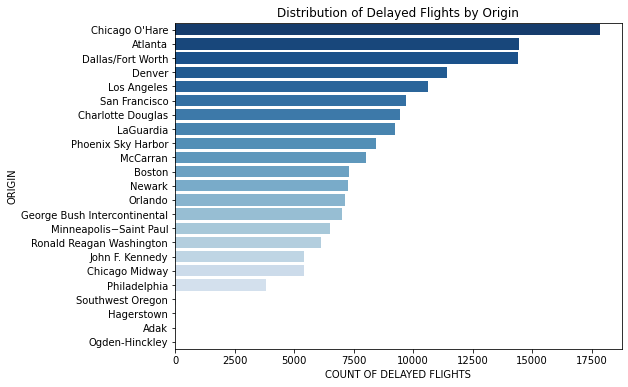

In [18]:
plt.figure(figsize = (8, 6))
_ = sns.barplot(x = delay_by_Origin['DEP_DEL15'], y = delay_by_Origin['ORIGIN'], palette = 'Blues_r').set_title('Distribution of Delayed Flights by Origin')
plt.xlabel('COUNT OF DELAYED FLIGHTS')

## *Distribution of Ontime & Delayed flights by ORIGIN*

In [19]:
pct_delay_by_Origin = df.groupby('ORIGIN')['DEP_DEL15'].mean().reset_index().rename(columns={'DEP_DEL15':'DELAYED'}).sort_values(by = 'DELAYED', ascending = False)
pct_delay_by_Origin['ORIGIN'] = pct_delay_by_Origin.ORIGIN.map(airport_dict)
pct_delay_by_Origin = pct_delay_by_Origin.dropna()
pct_delay_by_Origin['DELAYED'] = pct_delay_by_Origin['DELAYED'] * 100
pct_delay_by_Origin['ONTIME'] = 100 - pct_delay_by_Origin['DELAYED']

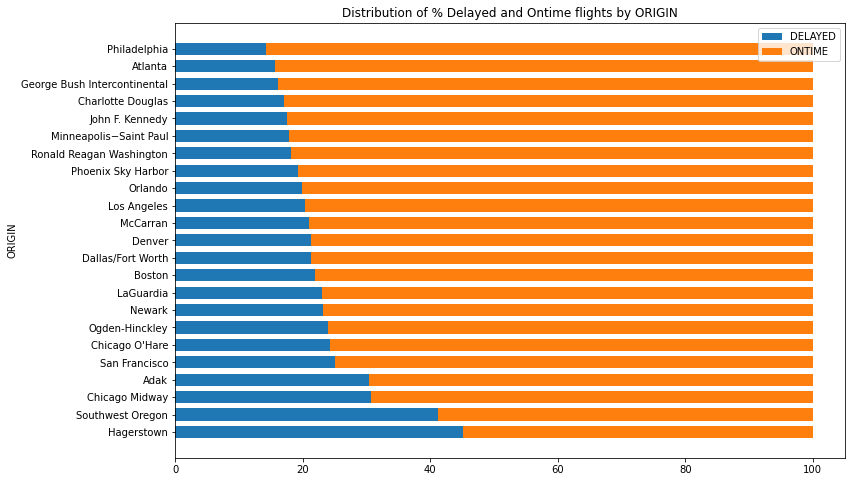

In [20]:
labels = pct_delay_by_Origin['ORIGIN']
width = 0.7       

fig, ax1 = plt.subplots(figsize=(12, 8))

ax1.barh(labels, pct_delay_by_Origin['DELAYED'], width, label='DELAYED')
ax1.barh(labels, pct_delay_by_Origin['ONTIME'], width, left=pct_delay_by_Origin['DELAYED'], label='ONTIME')

ax1.set_ylabel('ORIGIN')
ax1.set_title('Distribution of % Delayed and Ontime flights by ORIGIN')
ax1.legend()

plt.show()

*Airports Chicago Midaway, Newark have more % delayed flights when compared to Minneapolis, Atlanta which have least % delayed flights. Origin can be considered as an impotant feature*  

*Quarter 2 has most delayed flights followed by quarter 1 and quarter 3. Quarter might not be an important feature, but further distribution of flights by Month, Day of week can be observed*

## *Distribution of Delayed Flights by MONTH*

In [21]:
month_dict = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May',
              6: 'June', 7: 'July', 8: 'August', 9: 'September', 
              10: 'October', 11: 'November', 12: 'December'}

In [22]:
delay_by_Month = df.groupby('MONTH')['DEP_DEL15'].sum().reset_index().rename(columns={'DEP_DEL15':'DELAYED'}).sort_values(by = 'DELAYED', ascending = False)
delay_by_Month['MONTH'] = delay_by_Month.MONTH.map(month_dict)

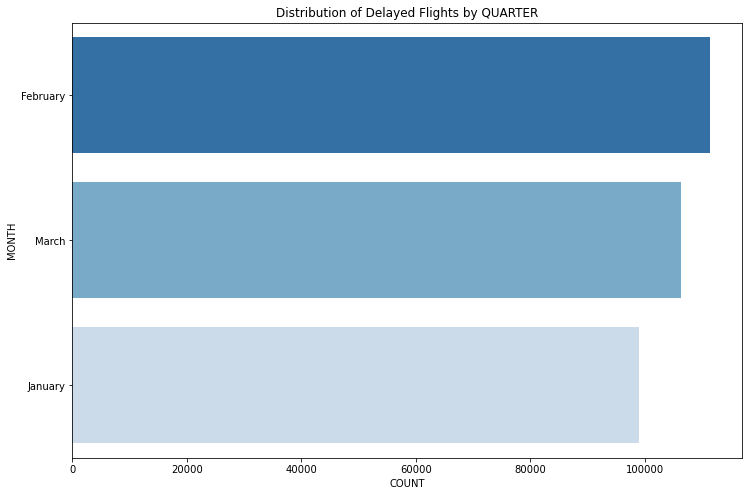

In [23]:
plt.figure(figsize = (12, 8))
_ = sns.barplot(x = delay_by_Month.DELAYED, 
            y = delay_by_Month.MONTH, 
            data = delay_by_Month, 
            palette = 'Blues_r', 
            orient = 'h',
            order = delay_by_Month.sort_values('DELAYED', ascending= False).MONTH).set_title('Distribution of Delayed Flights by QUARTER')
_ = plt.xlabel('COUNT')

## *Distribution of Ontime & Delayed flights by MONTH*

In [24]:
pct_delay_by_Month = df.groupby('MONTH')['DEP_DEL15'].mean().reset_index().rename(columns={'DEP_DEL15':'DELAYED'}).sort_values(by = 'DELAYED', ascending = False)
pct_delay_by_Month['MONTH'] = pct_delay_by_Month.MONTH.map(month_dict)
pct_delay_by_Month['DELAYED'] = pct_delay_by_Month['DELAYED'] * 100
pct_delay_by_Month['ONTIME'] = 100 - pct_delay_by_Month['DELAYED']

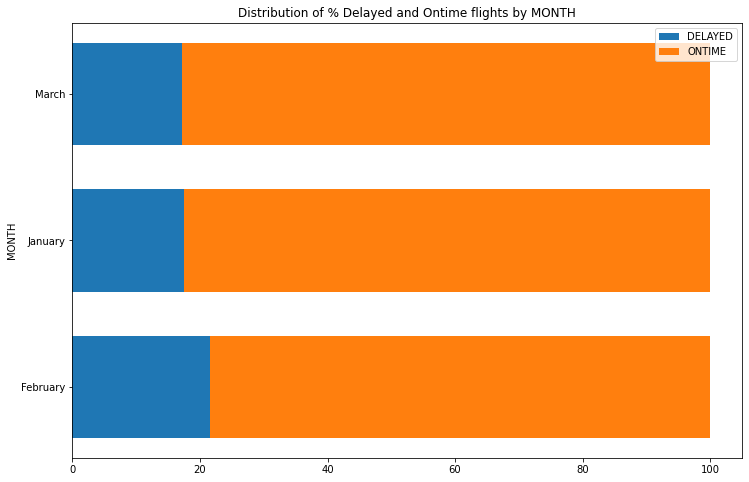

In [25]:
labels = pct_delay_by_Month['MONTH']
width = 0.7      

fig, ax1 = plt.subplots(figsize=(12, 8))

ax1.barh(labels, pct_delay_by_Month['DELAYED'], width, label='DELAYED')
ax1.barh(labels, pct_delay_by_Month['ONTIME'], width, left=pct_delay_by_Month['DELAYED'], label='ONTIME')

ax1.set_ylabel('MONTH')
ax1.set_title('Distribution of % Delayed and Ontime flights by MONTH')
ax1.legend()


plt.show()

*We see June, July, August having highest number of % delays*

## *Distribution of Delayed Flights by DAY_OF_WEEK*

In [26]:
day_dict = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}

In [27]:
delay_by_Day = df.groupby('DAY_OF_WEEK')['DEP_DEL15'].count().reset_index().rename(columns={'DEP_DEL15':'DELAYED'}).sort_values(by = 'DELAYED', ascending = False)
delay_by_Day['DAY_OF_WEEK'] = delay_by_Day.DAY_OF_WEEK.map(day_dict)

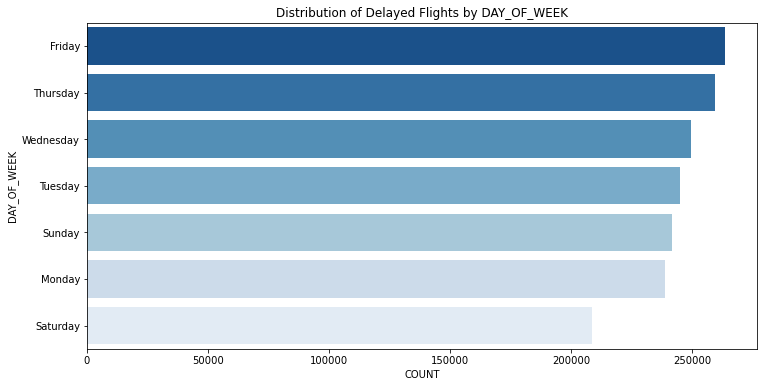

In [28]:
plt.figure(figsize = (12, 6))
_ = sns.barplot(x = delay_by_Day.DELAYED, 
            y = delay_by_Day.DAY_OF_WEEK, 
            data = delay_by_Day, 
            palette = 'Blues_r', 
            orient = 'h',
            order = delay_by_Day.sort_values('DELAYED', ascending= False).DAY_OF_WEEK).set_title('Distribution of Delayed Flights by DAY_OF_WEEK')
_ = plt.xlabel('COUNT')

## *Distribution of Ontime & Delayed flights by DAY_OF_WEEK*

In [29]:
pct_delay_by_Day = df.groupby('DAY_OF_WEEK')['DEP_DEL15'].mean().reset_index().rename(columns={'DEP_DEL15':'DELAYED'}).sort_values(by = 'DELAYED', ascending = False)
pct_delay_by_Day['DAY_OF_WEEK'] = pct_delay_by_Day.DAY_OF_WEEK.map(day_dict)
pct_delay_by_Day['DELAYED'] = pct_delay_by_Day['DELAYED'] * 100
pct_delay_by_Day['ONTIME'] = 100 - pct_delay_by_Day['DELAYED']

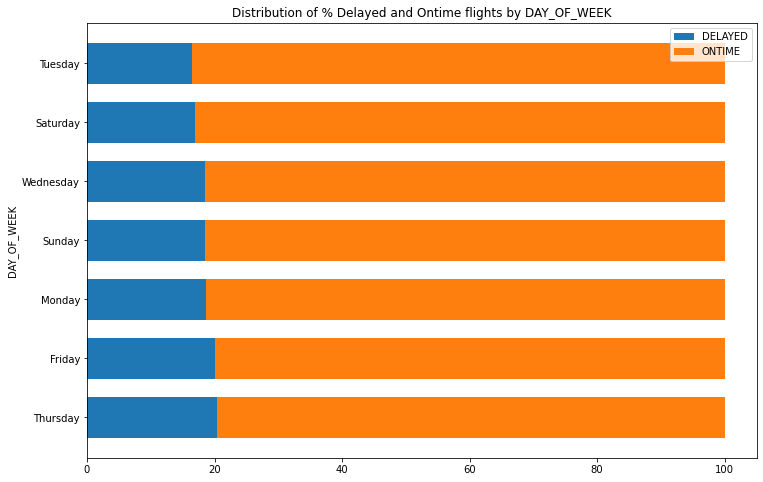

In [30]:
labels = pct_delay_by_Day['DAY_OF_WEEK']
width = 0.7      

fig, ax1 = plt.subplots(figsize=(12, 8))

ax1.barh(labels, pct_delay_by_Day['DELAYED'], width, label='DELAYED')
ax1.barh(labels, pct_delay_by_Day['ONTIME'], width, left=pct_delay_by_Day['DELAYED'], label='ONTIME')

ax1.set_ylabel('DAY_OF_WEEK')
ax1.set_title('Distribution of % Delayed and Ontime flights by DAY_OF_WEEK')
ax1.legend()


plt.show()

*Doesn't give much variance*

### *UniVariate Analysis*

### *Departure Delay Distribution*

In [31]:
LOG_DEP_DELAY = []
dd = df['DEP_DELAY'].dropna()
for n in dd:
    if n < 0:
        LOG_DEP_DELAY.append(-np.log(-n + 1))
    else:
        LOG_DEP_DELAY.append(np.log(n + 1))

Text(0, 0.5, 'Density')

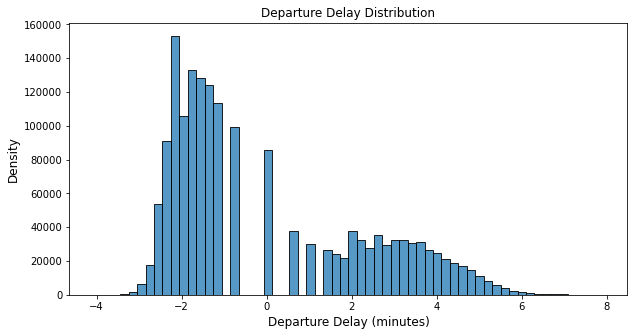

In [32]:
#Log Transform
plt.figure(figsize=(10,5));
sns.histplot(LOG_DEP_DELAY, bins = 60);
plt.title("Departure Delay Distribution", size=12)
plt.xlabel("Departure Delay (minutes)", size=12)
plt.ylabel("Density", size=12)

*Departure Delay is widely spread.*

### *Flight Duration Distribution*

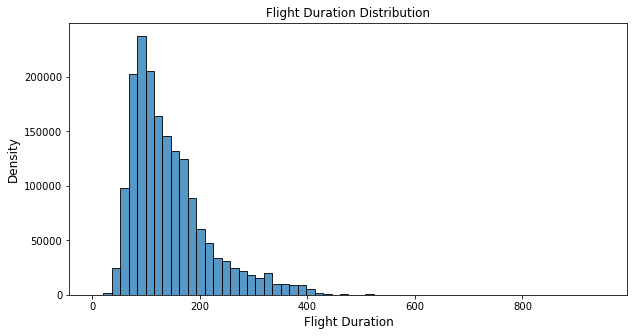

In [33]:
plt.figure(figsize=(10,5));
sns.histplot(df['CRS_ELAPSED_TIME'], bins = 60);
plt.title("Flight Duration Distribution", size=12)
plt.xlabel("Flight Duration", size=12)
plt.ylabel("Density", size=12);

*Most of the flights have flight duration less than 150 minutes*

### *Air Time Distribution*

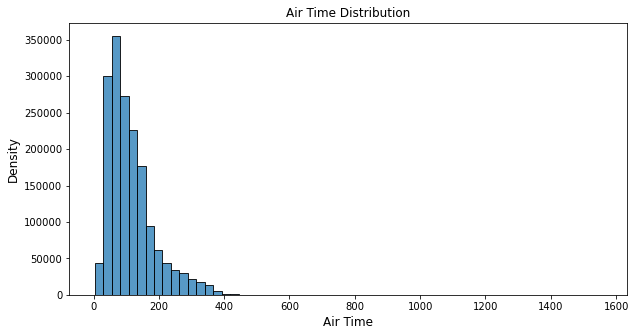

In [34]:
plt.figure(figsize=(10,5));
sns.histplot(df['AIR_TIME'], bins = 60);
plt.title("Air Time Distribution", size=12)
plt.xlabel("Air Time", size=12)
plt.ylabel("Density", size=12);

*Most of the flights have air time less than 150 minutes*

### *Distance Distribution*

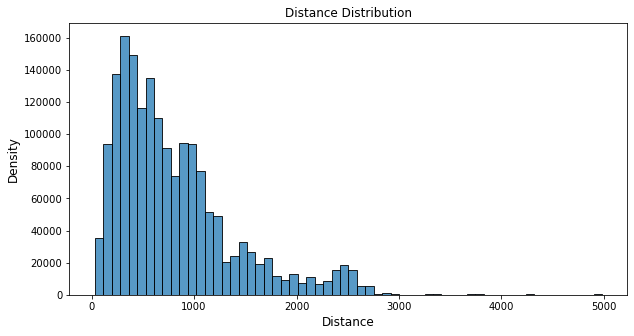

In [35]:
plt.figure(figsize=(10,5));
sns.histplot(df['DISTANCE'], bins = 60);
plt.title("Distance Distribution", size=12)
plt.xlabel("Distance", size=12)
plt.ylabel("Density", size=12);

*Most of the flights tarvel short distances within 1000 miles. Flight Duration, Air time and Distance are correlated*

### *Multivariate Analysis*

### *DELAY vs DISTANCE*

<AxesSubplot:xlabel='DEP_DEL15', ylabel='DISTANCE'>

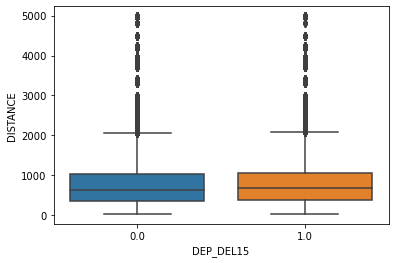

In [36]:
sns.boxplot(x = 'DEP_DEL15', y = 'DISTANCE', data = df)

### *DELAY vs CRS_ELAPSED_TIME*

<AxesSubplot:xlabel='DEP_DEL15', ylabel='CRS_ELAPSED_TIME'>

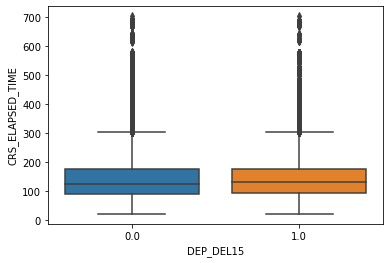

In [37]:
sns.boxplot(x = 'DEP_DEL15', y = 'CRS_ELAPSED_TIME', data = df)

### *DELAY VS AIR TIME*

<AxesSubplot:xlabel='DEP_DEL15', ylabel='AIR_TIME'>

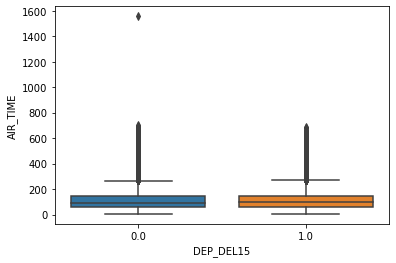

In [38]:
sns.boxplot(x = 'DEP_DEL15', y = 'AIR_TIME', data = df)

In [39]:
df.drop(df[df['AIR_TIME'] > 800].index, inplace = True)

*Elapsed time is 156, the AIR_TIME could be 155 or 157 instead of 1557*

*There are many outliers in DISTANCE, CRS_ELAPSED_TIME, AIR_TIME*

### *Dropping Highly Correlated features*

In [40]:
df.shape

(1749099, 55)

In [41]:
#https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [42]:
to_drop

['ORIGIN_AIRPORT_SEQ_ID',
 'DEST_AIRPORT_SEQ_ID',
 'DEP_TIME',
 'DEP_DELAY_NEW',
 'WHEELS_OFF',
 'ARR_TIME',
 'ARR_DELAY',
 'ARR_DELAY_NEW',
 'ACTUAL_ELAPSED_TIME',
 'AIR_TIME',
 'DISTANCE',
 'DISTANCE_GROUP']

<AxesSubplot:>

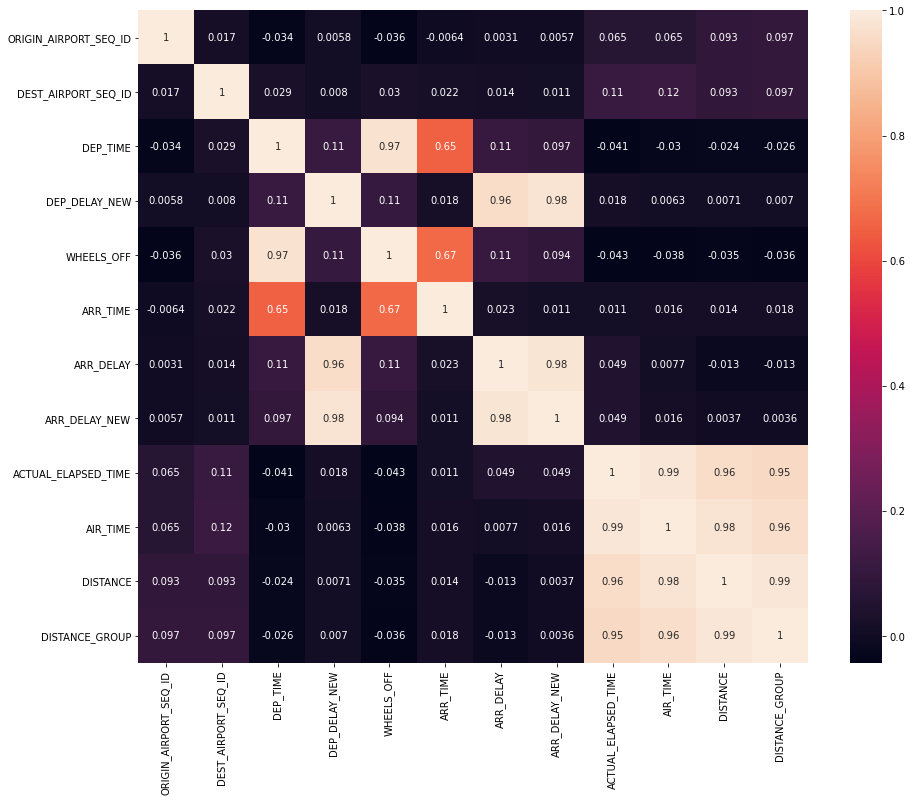

In [43]:
cov_matrix = df[to_drop].corr()
plt.figure(figsize = (15, 12))
sns.heatmap(cov_matrix, annot = True)

In [44]:
# Drop features
df.drop(to_drop, axis=1, inplace=True)

In [45]:
df.shape

(1749099, 43)

<AxesSubplot:>

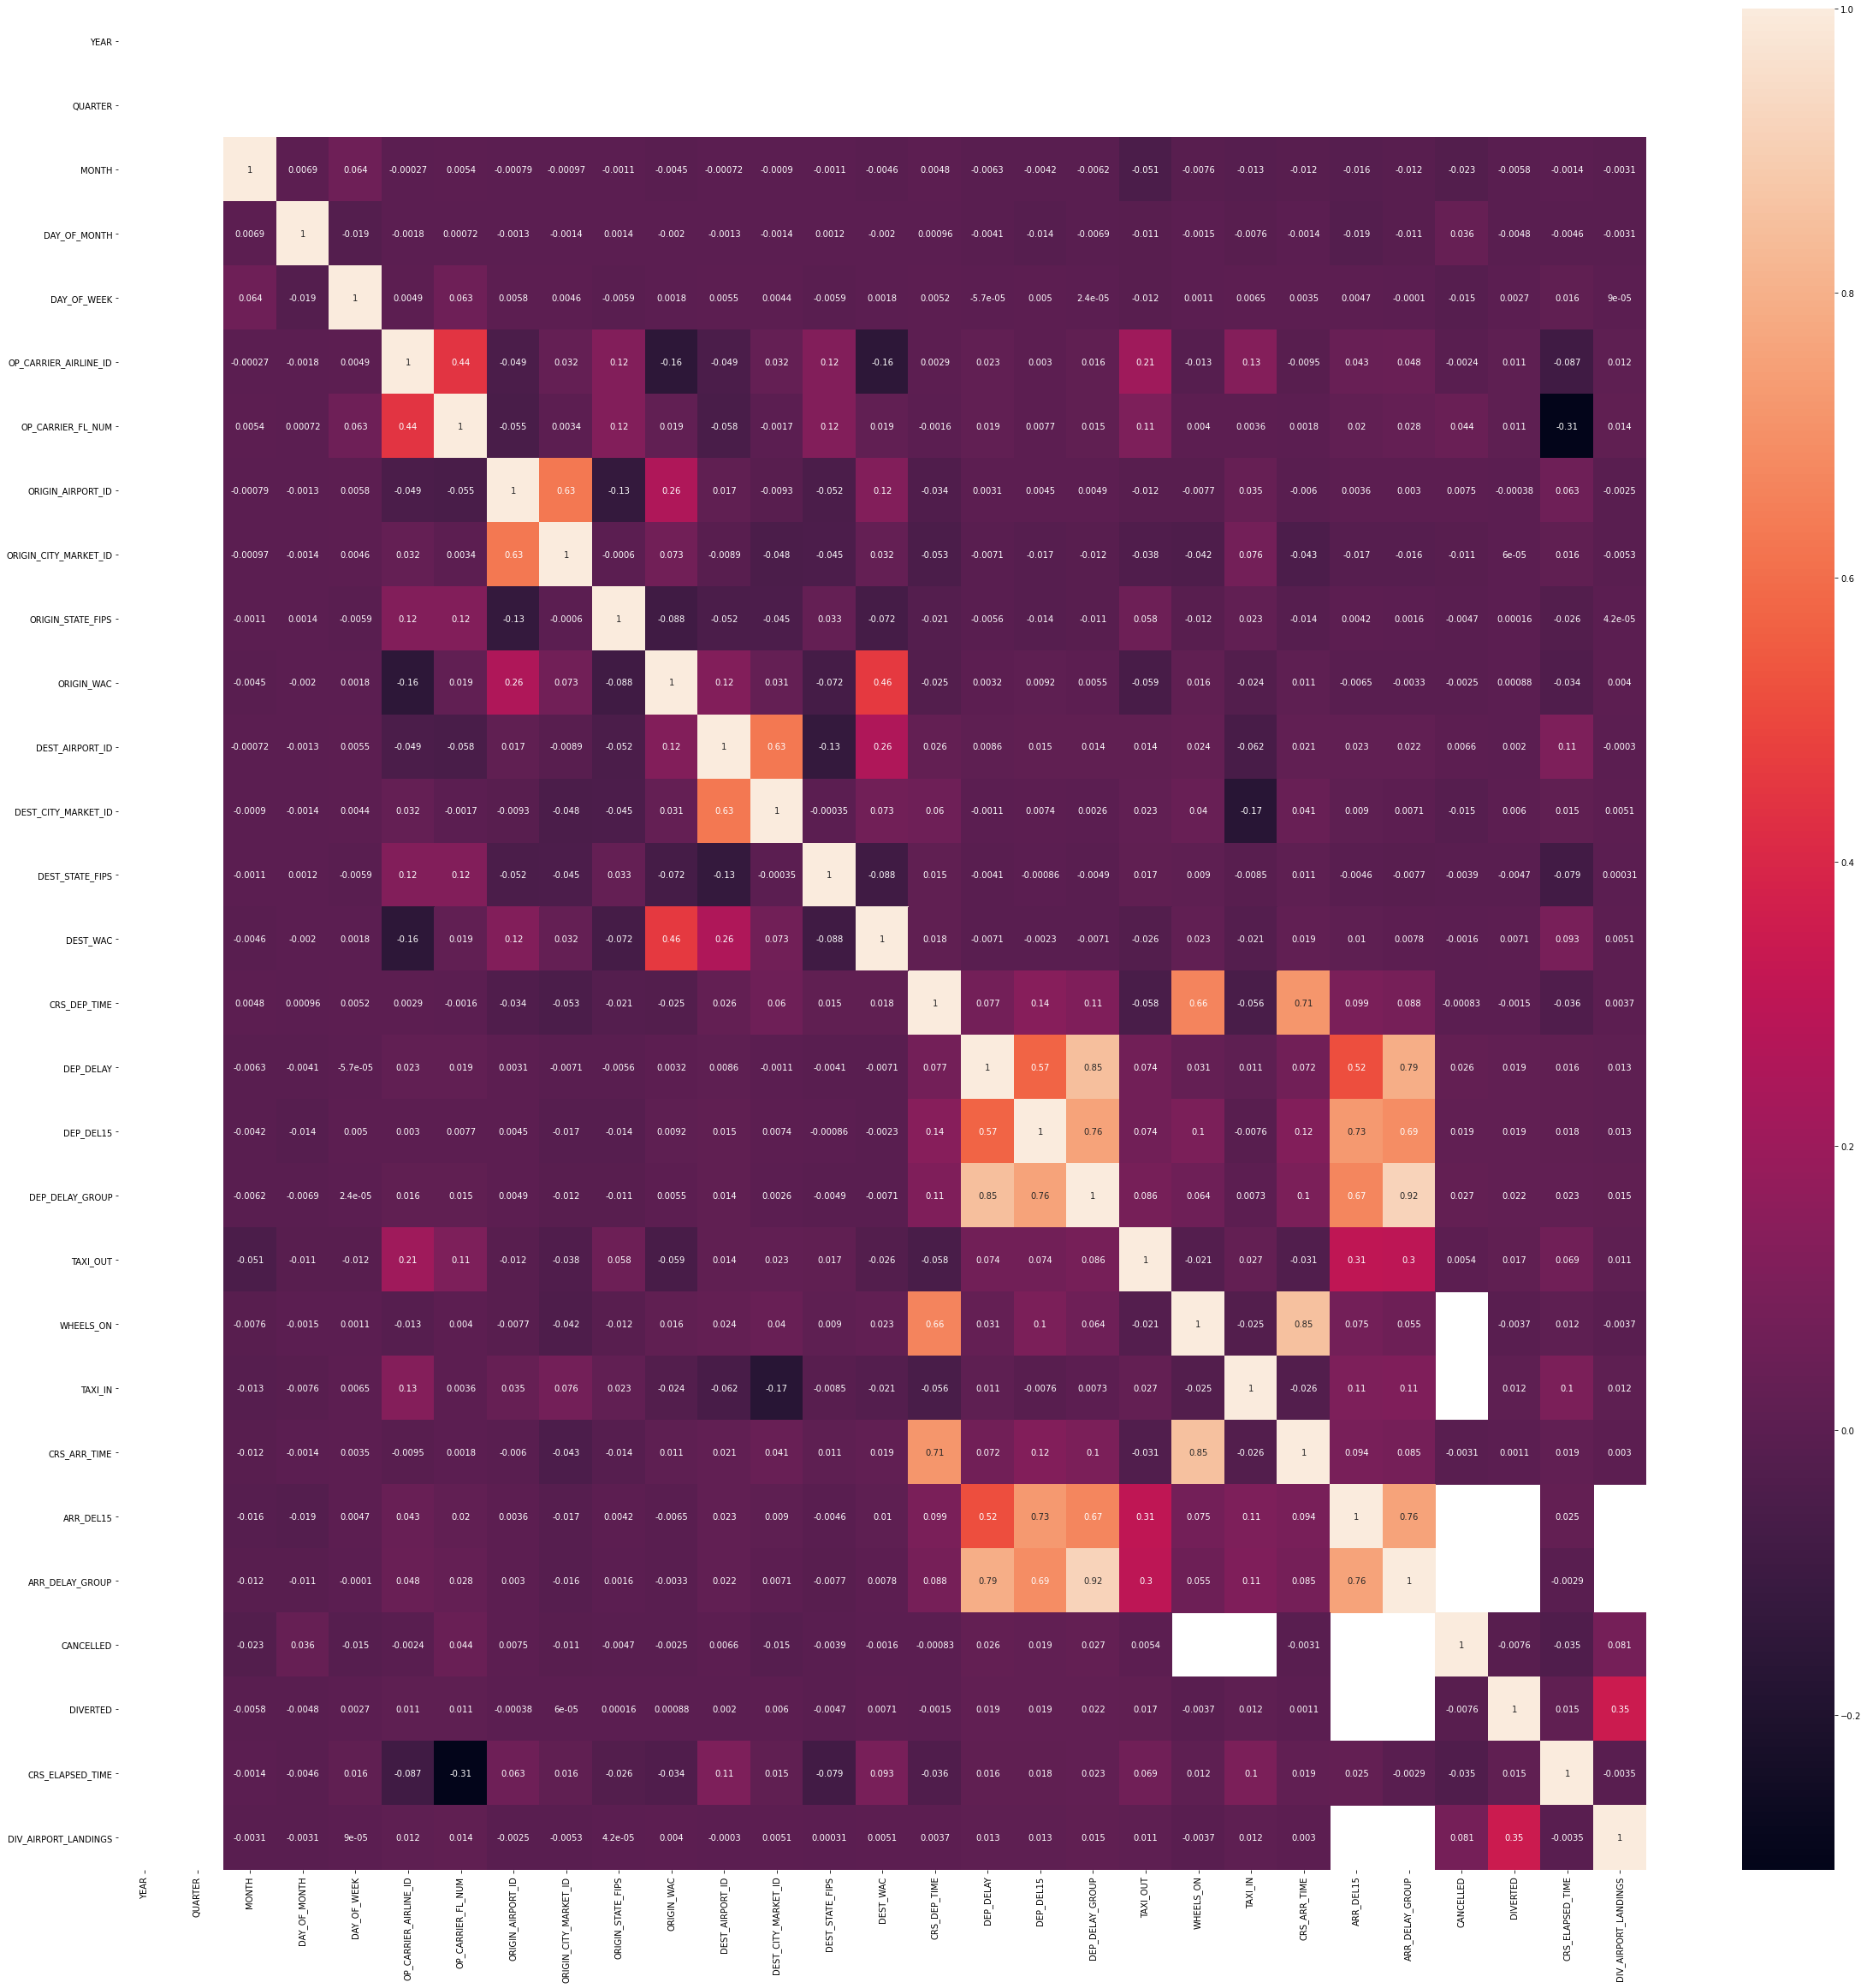

In [46]:
cov_matrix = df.corr()
plt.figure(figsize = (40, 40))
sns.heatmap(cov_matrix, annot = True)

In [48]:
# Drop features
df.drop(['DEP_DELAY_GROUP'], axis=1, inplace=True)

In [49]:
df.to_csv('03_clean_final.csv', index = False)